In [1]:
import os, math
import glob
from osgeo import gdal
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'D:\programmes\other\Massachusetts')
in_files = glob.glob('O*.tif')

def get_extent(fn):
    '''Returns min_x, max_y, max_x, min_y'''
    ds = gdal.Open(fn)
    gt = ds.GetGeoTransform()
    return (gt[0], gt[3], gt[0] + gt[1] * ds.RasterXSize,
    gt[3] + gt[5] * ds.RasterYSize)

min_x, max_y, max_x, min_y = get_extent(in_files[0])

for fn in in_files[1:]:
    minx, maxy, maxx, miny = get_extent(fn)
    min_x = min(min_x, minx)
    max_y = max(max_y, maxy)
    max_x = max(max_x, maxx)
    min_y = min(min_y, miny)
    
in_ds = gdal.Open(in_files[0])
gt = in_ds.GetGeoTransform()
rows = math.ceil((max_y - min_y) / -gt[5])
columns = math.ceil((max_x - min_x) / gt[1])

driver = gdal.GetDriverByName('gtiff')
out_ds = driver.Create('mosaic.tif', columns, rows)
out_ds.SetProjection(in_ds.GetProjection())
out_band = out_ds.GetRasterBand(1)

gt = list(in_ds.GetGeoTransform())
gt[0], gt[3] = min_x, max_y
out_ds.SetGeoTransform(gt)

for fn in in_files:
    in_ds = gdal.Open(fn)
    trans = gdal.Transformer(in_ds, out_ds, [])
    success, xyz = trans.TransformPoint(False, 0, 0)
    x, y, z = map(int, xyz)
    data = in_ds.GetRasterBand(1).ReadAsArray()
    out_band.WriteArray(data, x, y)
del in_ds, out_band, out_ds

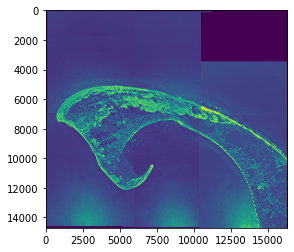

In [3]:
ds = gdal.Open("mosaic.tif")
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)

In [ ]:
import os
from osgeo import gdal
import matplotlib.pyplot as plt

In [4]:
os.chdir(r'D:\programmes\other\Switzerland')

original_ds = gdal.Open('dem_class.tif')
driver = gdal.GetDriverByName('gtiff')
ds = driver.CreateCopy('dem_class2.tif', original_ds)
band = ds.GetRasterBand(1)

colors = gdal.ColorTable()
colors.SetColorEntry(1, (112, 153, 89))
colors.SetColorEntry(2, (242, 238, 162))
colors.SetColorEntry(3, (242, 206, 133))
colors.SetColorEntry(4, (194, 140, 124))
colors.SetColorEntry(5, (214, 193, 156))

band.SetRasterColorTable(colors)
band.SetRasterColorInterpretation(gdal.GCI_PaletteIndex)

del band, ds

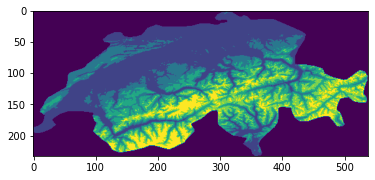

In [5]:
ds = gdal.Open("dem_class2.tif")
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
plt.figure()
plt.imshow(array)